# PROJECT : JOB CHANGE OF DATA SCIENTISTS 

In [ ]:
HR Analytics: Job Change of Data Scientists
Predict who will move to a new job

# Classification Algorithms:
K-Nearest Neighbor
Logistic Regression
SVM Classifier
Decision Tree
Random Forest
XGBoost
Gradient boosting
Adaboosting

1.Problem statement: Company wants to know how many people are willing to continue job.
2.Type of problem: Classification, Supervised learning.
3.Performance Measures: Accuracy, Precision, Recall, Confusion Matrix.

Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


# Performing EDA

Loading the dataset

In [8]:
df=pd.read_csv('/Users/Rashmi/Downloads/aug_train.csv')

In [9]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [10]:
df.shape

(19158, 14)

In [11]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [14]:
corr=df.corr()
corr

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


Visualisation part

<AxesSubplot:xlabel='target', ylabel='count'>

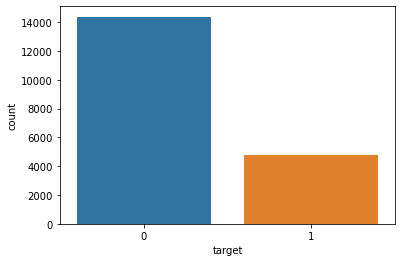

In [15]:
sns.countplot(x='target',data=df)

zero indicates that the candidate would stay at the company
We observe that most of the data scientist 3 times more decided to stay in company.

In [16]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

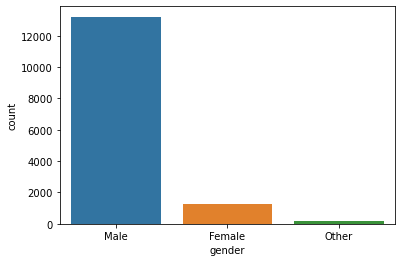

In [17]:
sns.countplot(x='gender',data=df)    

More number of male candidates are present

In [18]:
df['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

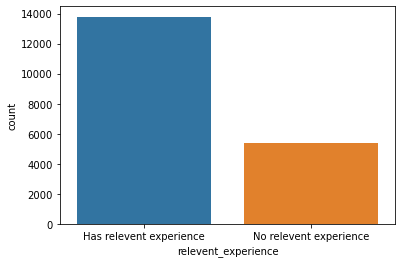

In [19]:
sns.countplot(x='relevent_experience',data=df)

More number of relevent experienced candidates are present

In [20]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

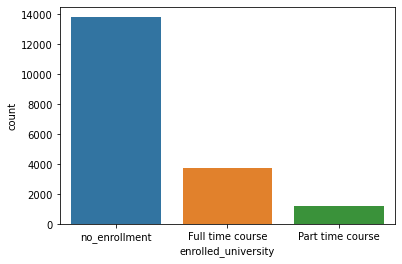

In [21]:
sns.countplot(x='enrolled_university',data=df)

more number of candidates are not enrolled for course

In [22]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

<AxesSubplot:xlabel='education_level', ylabel='count'>

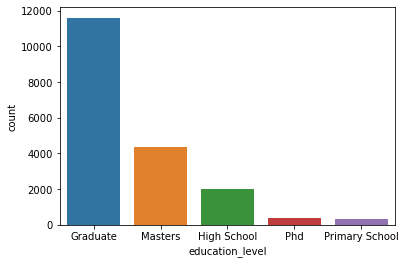

In [23]:
sns.countplot(x='education_level',data=df)

More number of graduate candidates are present

In [24]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

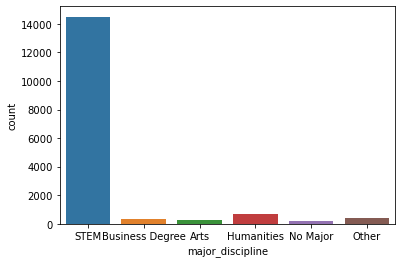

In [25]:
sns.countplot(x='major_discipline',data=df )

More number of candidates are for STEM

In [26]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

<AxesSubplot:xlabel='experience', ylabel='count'>

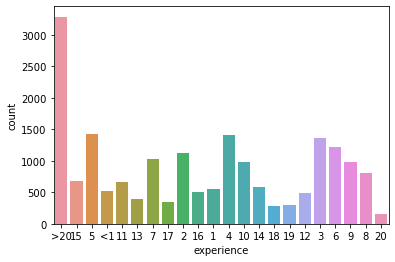

In [27]:
sns.countplot(x='experience',data=df)

More number candidates have an experience of about 20 years

In [28]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

<AxesSubplot:xlabel='company_size', ylabel='count'>

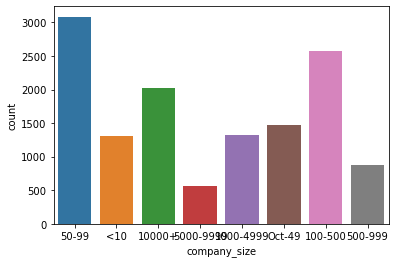

In [29]:
sns.countplot(x='company_size',data=df)

Highest number of candidates are from a company size of 50-99

In [30]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

<AxesSubplot:xlabel='company_type', ylabel='count'>

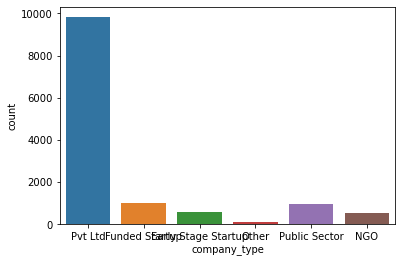

In [31]:
sns.countplot(x='company_type',data=df)

More number of candidates are from PVT LTD company 

In [32]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

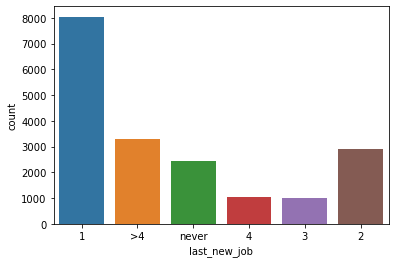

In [33]:
sns.countplot(x='last_new_job',data=df)

Convetion of categorical varriables to numerical

In [33]:
df.replace(to_replace = 'Has relevent experience',value = 'Yes',inplace = True)
df.replace(to_replace = 'No relevent experience',value='No',inplace = True )

df.replace(to_replace = '<1',value = '0',inplace = True)
df.replace(to_replace = '>20',value = '21',inplace=True)
df.replace(to_replace = 'never',value = '0',inplace=True)
df.replace(to_replace = '>4',value = '5',inplace=True)

df.replace(to_replace = '<10',value = 'around_10',inplace=True)
df.replace(to_replace = '10/49',value = 'around_50',inplace=True)
df.replace(to_replace = '50-99',value = 'around_100',inplace=True)
df.replace(to_replace = '100-500',value = 'around_500',inplace=True)
df.replace(to_replace = '500-999',value = 'around_1000',inplace=True)
df.replace(to_replace = '1000-4999',value = 'around_5000',inplace=True)
df.replace(to_replace = '5000-9999',value = 'around_10000',inplace=True)
df.replace(to_replace = '10000+',value = 'more_than_10000',inplace=True)

df.replace(to_replace = 'Full time course',value = 'Full_time_course',inplace=True)
df.replace(to_replace = 'Part time course',value = 'Part_time_course',inplace=True)

df.replace(to_replace = 'Primary School',value = 'Primary_School',inplace=True)
df.replace(to_replace = 'High School',value = 'High_School',inplace=True)

df.replace(to_replace = 'Business Degree',value = 'Business_Degree',inplace=True)
df.replace(to_replace = 'No Major',value = 'No_Major',inplace=True)

df.replace(to_replace = 'Pvt Ltd',value = 'Pvt_Ltd',inplace=True)
df.replace(to_replace = 'Funded Startup',value = 'Funded_Startup',inplace=True)
df.replace(to_replace = 'Public Sector',value = 'Public_Sector',inplace=True)
df.replace(to_replace = 'Early Stage Startup',value = 'Early_Stage_Startup',inplace=True)

df['major_discipline'].replace('Other','Other_major',inplace=True)
df['company_type'].replace('Other','Other_type',inplace=True)

In [34]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No,no_enrollment,Graduate,STEM,15,around_100,Pvt_Ltd,5,47,0
2,11561,city_21,0.624,NaN,No,Full_time_course,Graduate,STEM,5,NaN,NaN,0,83,0
3,33241,city_115,0.789,NaN,No,NaN,Graduate,Business_Degree,0,NaN,Pvt_Ltd,0,52,1
4,666,city_162,0.767,Male,Yes,no_enrollment,Masters,STEM,21,around_100,Funded_Startup,4,8,0


# Data Preprocessing

First of all we are going to drop unnecessary columns,so we don't require enrollee_id and city column

In [35]:
df.drop(['enrollee_id','city'],axis=1,inplace=True)

Columns in which we have 2% or less than 2% null values we can drop those null values

In [36]:
df.isnull().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [37]:
df.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], axis=0, inplace=True)

In [38]:
# after dropping those null values
df.shape

(18014, 12)

Now we are going to fill null values with their mode as all the columns left have dtype as 'object'

In [39]:
col_mode = ['gender','company_size','major_discipline','company_type','relevent_experience']
for col in col_mode:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [40]:
df = df.astype({'experience':int,'last_new_job':int})

Handling Categorical Values

In [41]:
# get dummies
education_df = pd.get_dummies(df[['education_level']],drop_first=True,prefix=[None])
company_size_df = pd.get_dummies(df[['company_size']],drop_first=True,prefix=[None])
company_type_df = pd.get_dummies(df[['company_type']],drop_first=True,prefix=[None])
major_df = pd.get_dummies(df[['major_discipline']],drop_first=True,prefix=[None])
university_df = pd.get_dummies(df[['enrolled_university']],drop_first=True,prefix=[None])
experience_df = pd.get_dummies(df[['relevent_experience']],drop_first=True,prefix=[None])
gender_df = pd.get_dummies(df[['gender']],drop_first=True,prefix=[None])

In [42]:
# drop original columns
df.drop(['education_level','company_size','company_type','major_discipline','enrolled_university',
         'relevent_experience', 'gender'],axis=1,inplace=True)

In [43]:
final_df = pd.concat([df,education_df,company_size_df,company_type_df,major_df,university_df,experience_df,
                      gender_df],axis=1) 

In [44]:
final_df.head()

,city_development_index,experience,last_new_job,training_hours,target,High_School,Masters,Phd,Primary_School,around_10,...,Business_Degree,Humanities,No_Major,Other_major,STEM,Part_time_course,no_enrollment,Yes,Male,Other
0,0.920,21,1,36,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
1,0.776,15,5,47,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0.624,5,0,83,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.767,21,4,8,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,0
5,0.764,11,1,24,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0


In [45]:
X = final_df.drop(['target'], axis = 1)
Y = final_df['target']

In [46]:
#sns.countplot(df['target'])

#We can see that our dataset is imbalanced dataset.We are going to use smote technique to deal with our 
imablanced dataset

In [47]:
df.isnull().sum()

city_development_index    0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [48]:
df.head()

,city_development_index,experience,last_new_job,training_hours,target
0,0.920,21,1,36,1
1,0.776,15,5,47,0
2,0.624,5,0,83,0
4,0.767,21,4,8,0
5,0.764,11,1,24,1


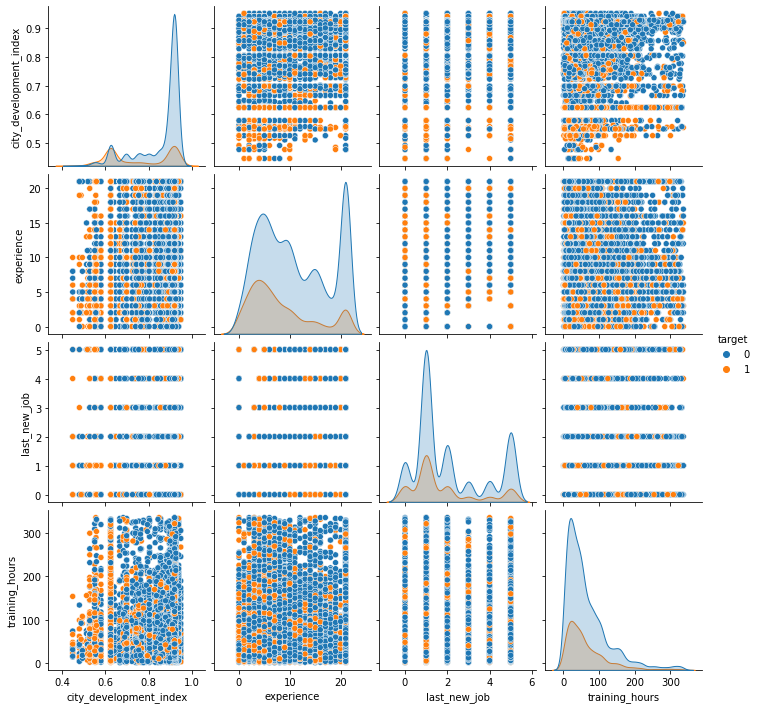

In [49]:
sns.pairplot(df,hue='target')

We need to normalize our dataset so it will not get bias towards only particular feature

Logestic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# SPLITTING

Splitting the target values(dependent variables) and features(independent variables)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=101)

In [52]:
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

# Logestic Regression

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
accuracy=confusion_matrix(y_test,predictions)

In [57]:
accuracy

array([[3827,  254],
       [ 969,  355]])

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy=accuracy_score(y_test,predictions)         
accuracy

0.7737280296022202

In [60]:
#Evaluation

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      4081
           1       0.58      0.27      0.37      1324

    accuracy                           0.77      5405
   macro avg       0.69      0.60      0.61      5405
weighted avg       0.75      0.77      0.74      5405



#  KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

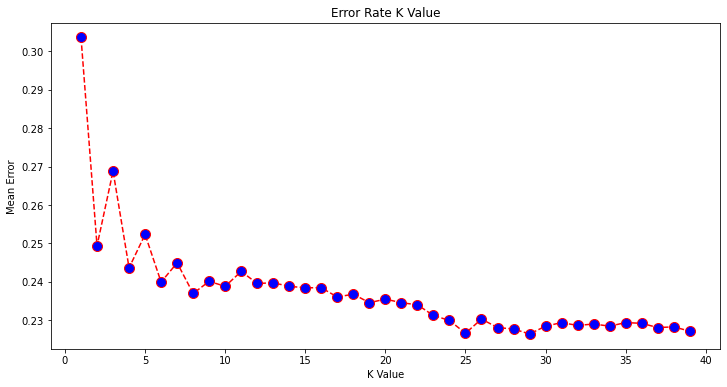

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [66]:
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.7733580018501388

#  pipelines

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [77]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])
pipeline_dT=Pipeline([ ('dT_classifier',DecisionTreeClassifier(random_state=42))])
pipeline_Rf=Pipeline([('Rf_classifier',RandomForestClassifier())])
pipeline_svc=Pipeline([('svc',SVC())])
pipelines = [pipeline_lr, pipeline_dT, pipeline_Rf, pipeline_svc]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

In [78]:
for pipes in pipelines:
    pipes.fit(X_train,y_train)

In [79]:
cv_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.771513 
Decision Tree: 0.705370 
RandomForest: 0.767467 
SVC: 0.769292 


# Ensamble techniques

In [80]:
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7639222941720629

<AxesSubplot:>

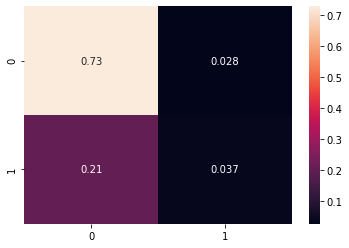

In [81]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf/np.sum(cf),annot=True)

In [82]:
clf = AdaBoostClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7605920444033303

In [88]:
#from xgboost import XGBClassifier

In [ ]:
import warnings

In [ ]:
#clf = XGBClassifier(colsample_bytree= 0.8,
 gamma= 1.5,
 max_depth= 5,
 min_child_weigh= 1,
 subsample= 0.6)

clf.fit(X_train, y_train)

In [85]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [86]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7605920444033303

# 1) Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#initial model without hyperparameter tuning
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

# 2)RandomForest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

# 3)Random Forest with Hyperparameter tuning using RandomSearchCV

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [99]:
#hyperparameters values
params = {'criterion' : ['gini','entropy'],'max_depth' : randint(5, 9),'max_features':randint(1, 9),'min_samples_leaf':randint(1, 9),
'n_estimators':randint(100,250)}
#### initial model
model = RandomForestClassifier()

random_search = RandomizedSearchCV(model,param_distributions = params,cv = 10)
#In [18]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12a2fbca0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1281ebc40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12a2d4160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12a2fb310>})

In [96]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x128a38ca0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x128a29910>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x128a2c130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x128a29d30>})

In [101]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 8,
 'min_samples_leaf': 1,
 'n_estimators': 146}

In [102]:
random_search.best_estimator_

RandomForestClassifier(max_depth=7, max_features=8, n_estimators=146)

In [103]:
random_search.best_score_

0.7827739385471345

In [104]:
best_random = random_search.best_estimator_
# best_random = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='entropy', max_depth=5, max_features=6,
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=2, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=100,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

In [105]:
y_pred = best_random.predict(X_test)
accuracy_score(y_test,y_pred)

0.7635522664199815

# Final Accuracy
1. KNN                   0.773358
2. Logistic Regression:  0.773728
3. Decision Tree:        0.704184 
4. RandomForest:         0.771424 
5. SVC:                  0.775172
6. GradientBoosting      0.763530
7. AdaBoostClassifier    0.760199
6. XGBOOST               0.76210